<a href="https://colab.research.google.com/github/TSHABBA01/JavaPrograms/blob/main/Multilayer%20Neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class Distribution:
Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64
Cross-validated Accuracy: 0.9247

Confusion Matrix:
[[432  57]
 [ 33 621]]

Accuracy: 0.9213
Precision (macro): 0.9225
Sensitivity / Recall (macro): 0.9165
F1 Score (macro): 0.9190


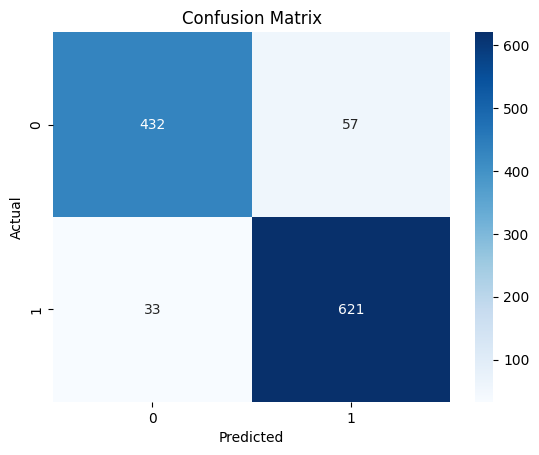


Feature Importances:
             Feature  Importance
2  Major_Axis_Length    0.292893
1          Perimeter    0.238058
0               Area    0.158715
5        Convex_Area    0.156717
4       Eccentricity    0.082345
3  Minor_Axis_Length    0.039906
6             Extent    0.031365


In [ ]:
import pandas as pd
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load ARFF file
data, meta = arff.loadarff("Rice_Cammeo_Osmancik.arff")
df = pd.DataFrame(data)

# Decode byte strings in 'Class' column
df['Class'] = df['Class'].apply(lambda x: x.decode('utf-8'))

# Show class distribution
print("Class Distribution:")
print(df['Class'].value_counts())

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Random Forest model with further optimized hyperparameters
clf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42,
    bootstrap=True,
    max_features='log2'
)

# Fit the model
clf.fit(X_train, y_train)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f}")

# Predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')  # Sensitivity
f1 = f1_score(y_test, y_pred, average='macro')

# Output results
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Sensitivity / Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print("\nFeature Importances:")
print(importance_df.sort_values(by='Importance', ascending=False))
